In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Read in data from NASA exoplenet archive 
df = pd.read_csv(r"C:\Users\julia\Downloads\csv_main.csv", skiprows=78)

In [46]:
def linear_regression_analysis_with_standardized_errors(df, predictor_var, response_var, error_lower_var, error_upper_var, x_label, y_label, log=False):
    """
    Performs weighted linear regression analysis with standardized errors.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    predictor_var: Column name for the predictor variable.
    response_var: Column name for the response variable.
    error_lower_var: Column name for the lower error limit of the response variable.
    error_upper_var: Column name for the upper error limit of the response variable.
    x_label: Label for the x-axis.
    y_label: Label for the y-axis.
    log: Whether to apply log scale on axes.
    """
    # Filter out rows with NaN or infinite values in any of the columns
    df_filtered = df.dropna(subset=[predictor_var, response_var, error_lower_var, error_upper_var])
    df_filtered = df_filtered.replace([np.inf, -np.inf], np.nan).dropna()

    # Standardize errors, take the average of absolute values of lower and upper errors
    errors_standardized = 0.5 * (abs(df_filtered[error_lower_var]) + abs(df_filtered[error_upper_var]))

    # Calculate weights as inverse of squared errors
    weights = 1 / errors_standardized**2

    X = df_filtered[[predictor_var]]
    y = df_filtered[response_var]
    X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X, y, weights, test_size=0.2, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train, sample_weight=weights_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred, sample_weight=weights_test)
    r2 = r2_score(y_test, y_pred, sample_weight=weights_test)

    # Display results
    print(f"Weighted Linear Regression Analysis for {x_label} vs {y_label}")
    print("Weighted Mean Squared Error:", mse)
    print("Weighted R-squared:", r2)

    # Plot results
    sorted_indices = np.argsort(X_test.iloc[:, 0])
    X_test_sorted = X_test.iloc[sorted_indices, 0]
    y_test_sorted = y_test.iloc[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]

    plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual Data', marker='o')  
    plt.scatter(X_test_sorted, y_pred_sorted, color='red', label='Predicted Points', marker='s') 
    plt.plot(X_test_sorted, y_pred_sorted, color='green', label='Best Fit Line')  
    plt.title(f'Weighted Linear Regression: {x_label} vs {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.legend()
    plt.show()
    

def polynomial_regression_analysis_with_errors(df, predictor_var, response_var, error_lower_var, error_upper_var, degree, x_label, y_label, log=False):
    """
    Performs weighted polynomial regression analysis with standardized errors, 
    and plots both the best fit line, actual data points, and predicted points.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    predictor_var: Column name for the predictor variable.
    response_var: Column name for the response variable.
    error_lower_var: Column name for the lower error limit of the response variable.
    error_upper_var: Column name for the upper error limit of the response variable.
    degree: Degree of the polynomial regression.
    x_label: Label for the x-axis.
    y_label: Label for the y-axis.
    log: Whether to apply log scale on axes.
    """
    # Filter out rows with NaN or infinite values in any of the columns
    df_filtered = df.dropna(subset=[predictor_var, response_var, error_lower_var, error_upper_var])
    df_filtered = df_filtered.replace([np.inf, -np.inf], np.nan).dropna()

    # Standardize errors (average of absolute values of lower and upper errors)
    errors_standardized = 0.5 * (abs(df_filtered[error_lower_var]) + abs(df_filtered[error_upper_var]))

    # Calculate weights as inverse of squared errors
    weights = 1 / errors_standardized**2

    X = df_filtered[[predictor_var]]
    y = df_filtered[response_var]
    X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X, y, weights, test_size=0.2, random_state=0)
    poly = PolynomialFeatures(degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    model_poly = LinearRegression()
    model_poly.fit(X_poly_train, y_train, sample_weight=weights_train)
    y_pred_poly = model_poly.predict(X_poly_test)
    mse_poly = mean_squared_error(y_test, y_pred_poly, sample_weight=weights_test)
    r2_poly = r2_score(y_test, y_pred_poly, sample_weight=weights_test)

    # Display results
    print(f"Weighted Polynomial Regression (Degree = {degree}):")
    print("Weighted Mean Squared Error:", mse_poly)
    print("Weighted R-squared:", r2_poly)

    # Plot results
    sorted_indices = np.argsort(X_test.iloc[:, 0])
    X_test_sorted = X_test.iloc[sorted_indices, 0]
    y_test_sorted = y_test.iloc[sorted_indices]
    y_pred_sorted = y_pred_poly[sorted_indices]

    plt.scatter(X_test_sorted, y_test_sorted, color='blue', label='Actual Data', marker='o')  
    plt.scatter(X_test_sorted, y_pred_sorted, color='green', label='Predicted Points', marker='s') 
    plt.plot(X_test_sorted, y_pred_sorted, color='red', label='Best Fit Line')
    plt.title(f'Weighted Polynomial Regression (Degree = {degree}): {x_label} vs {y_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if log:
        plt.xscale('log')
        plt.yscale('log')
    plt.legend()
    plt.show()

Analysis with error for Orbital Period vs Semi-Major Axis

Weighted Polynomial Regression (Degree = 2):
Weighted Mean Squared Error: 0.00024782861827635184
Weighted R-squared: 0.879910406076271


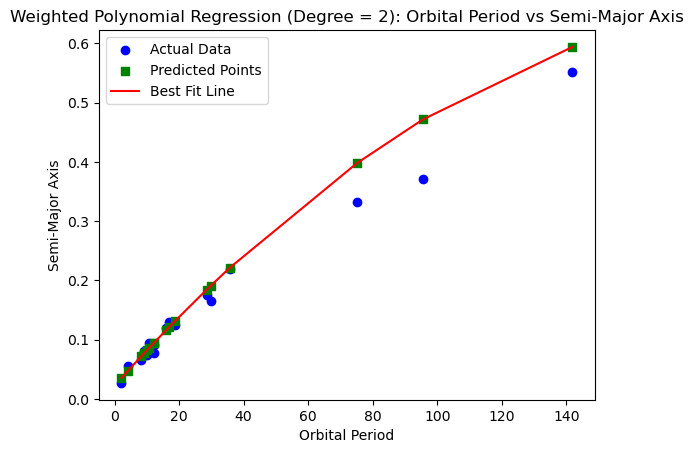

Weighted Linear Regression Analysis for Orbital Period vs Semi-Major Axis
Weighted Mean Squared Error: 0.000361516172976902
Weighted R-squared: 0.8248211578162223


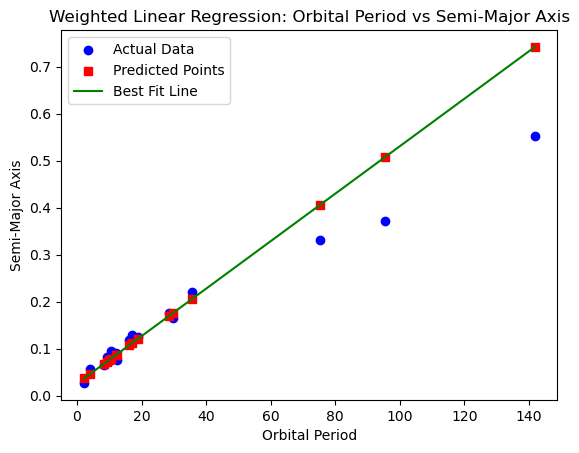

In [37]:
polynomial_regression_analysis_with_errors(df, 'pl_orbper', 'pl_orbsmax', 'pl_orbsmaxerr2', 'pl_orbsmaxerr1', 2, 'Orbital Period', 'Semi-Major Axis')
linear_regression_analysis_with_standardized_errors(df, 'pl_orbper', 'pl_orbsmax', 'pl_orbsmaxerr2', 'pl_orbsmaxerr1', 'Orbital Period', 'Semi-Major Axis')

Analysis with error for Mass vs Radius

Weighted Linear Regression Analysis for Planet Mass vs Planet Radius
Weighted Mean Squared Error: 2.5349328019589272
Weighted R-squared: 0.17008855323443983


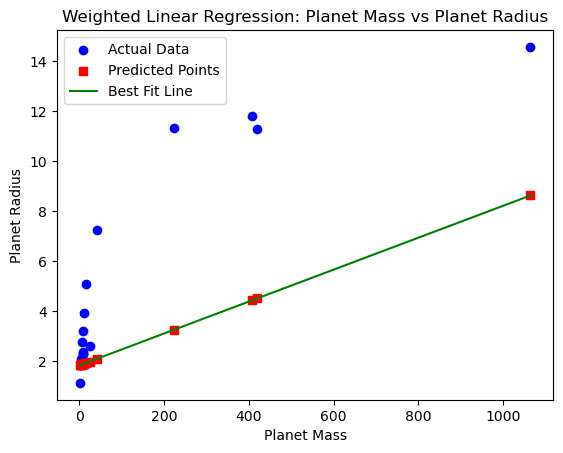

Weighted Polynomial Regression (Degree = 2):
Weighted Mean Squared Error: 1.379218582018024
Weighted R-squared: 0.5484577390280387


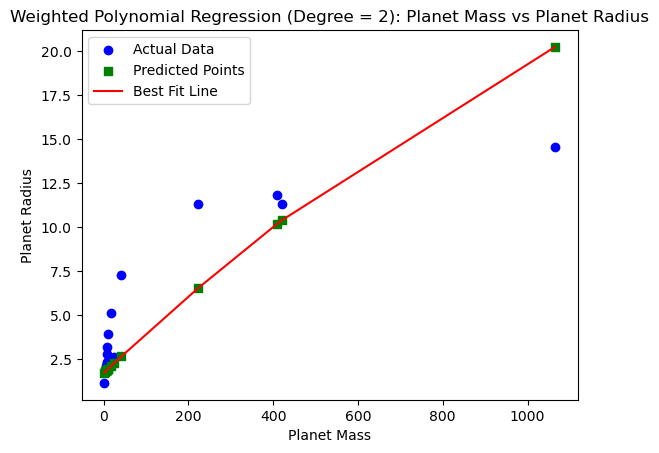

In [44]:
linear_regression_analysis_with_standardized_errors(df, 'pl_bmasse', 'pl_rade', 'pl_radeerr2', 'pl_radeerr1', 'Planet Mass', 'Planet Radius')
polynomial_regression_analysis_with_errors(df, 'pl_bmasse', 'pl_rade', 'pl_radeerr2', 'pl_radeerr1', 2, 'Planet Mass', 'Planet Radius')